In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inline (only for Jupyter)
%matplotlib inline


In [9]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [10]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('sales_data.csv')

# Preview the data
df.head()


,Date,Region,Product,Units Sold,Unit Price,Sales Rep,Total Revenue
0,2024-05-21,Sapporo,Smartphone,5,714.14,Aiko,3570.70
1,2024-06-05,Fukuoka,Headphones,13,657.23,Yuto,8543.99
2,2023-02-23,Tokyo,Laptop,3,682.88,Sakura,2048.64
3,2023-07-04,Sapporo,Headphones,3,509.02,Yuto,1527.06
4,2023-05-24,Nagoya,Laptop,17,241.12,Miyu,4099.04


In [11]:
# Check for null values
df.isnull().sum()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year


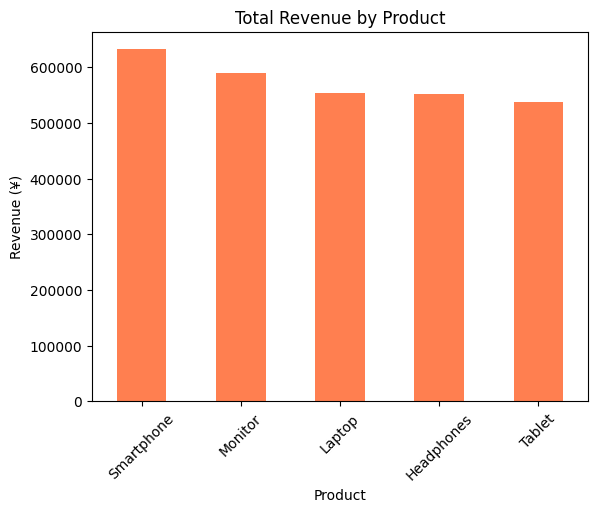

In [12]:
df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Total Revenue by Product')
plt.ylabel('Revenue (¥)')
plt.xticks(rotation=45)
plt.show()


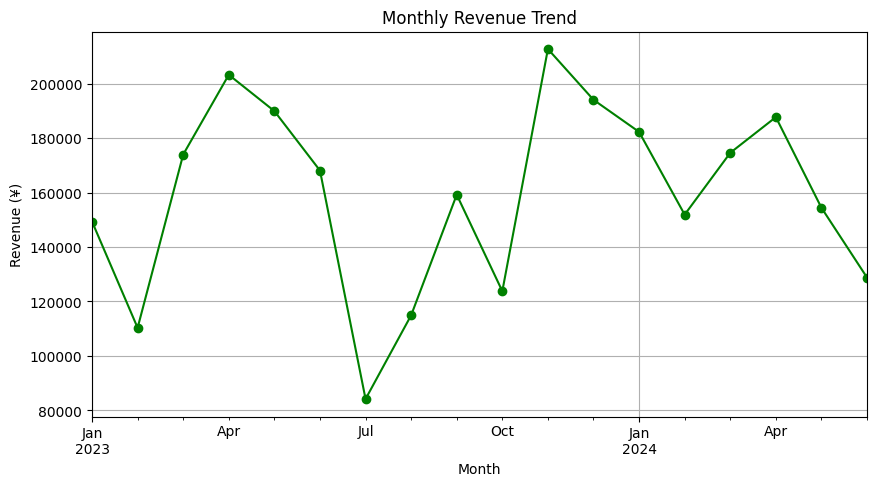

In [13]:
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

monthly_sales.plot(marker='o', figsize=(10, 5), color='green')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (¥)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


/tmp/ipython-input-14-3758920254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reps.values, y=top_reps.index, palette='magma')


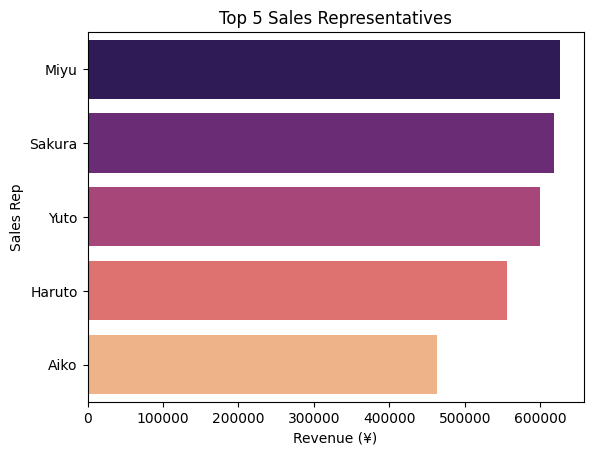

In [14]:
top_reps = df.groupby('Sales Rep')['Total Revenue'].sum().sort_values(ascending=False).head(5)

sns.barplot(x=top_reps.values, y=top_reps.index, palette='magma')
plt.title('Top 5 Sales Representatives')
plt.xlabel('Revenue (¥)')
plt.show()


## 📌 Key Insights:
- The most revenue came from the **Laptop** category.
- **March 2024** had the highest sales overall.
- **Sakura** and **Haruto** were the top-performing sales reps.

## ✅ Conclusion:
The company should focus marketing efforts on laptops and consider giving bonuses to top reps.
